[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/14_Activation_Functions_Regression_Complex_data.ipynb)

# 14 Comparison of Activation Functions Using Regression


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FFS_01433.csv to FFS_01433.csv
User uploaded file "FFS_01433.csv" with length 14378532 bytes


In [0]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers, LeakyReLU, PReLU, regularizers, Dropout
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [5]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


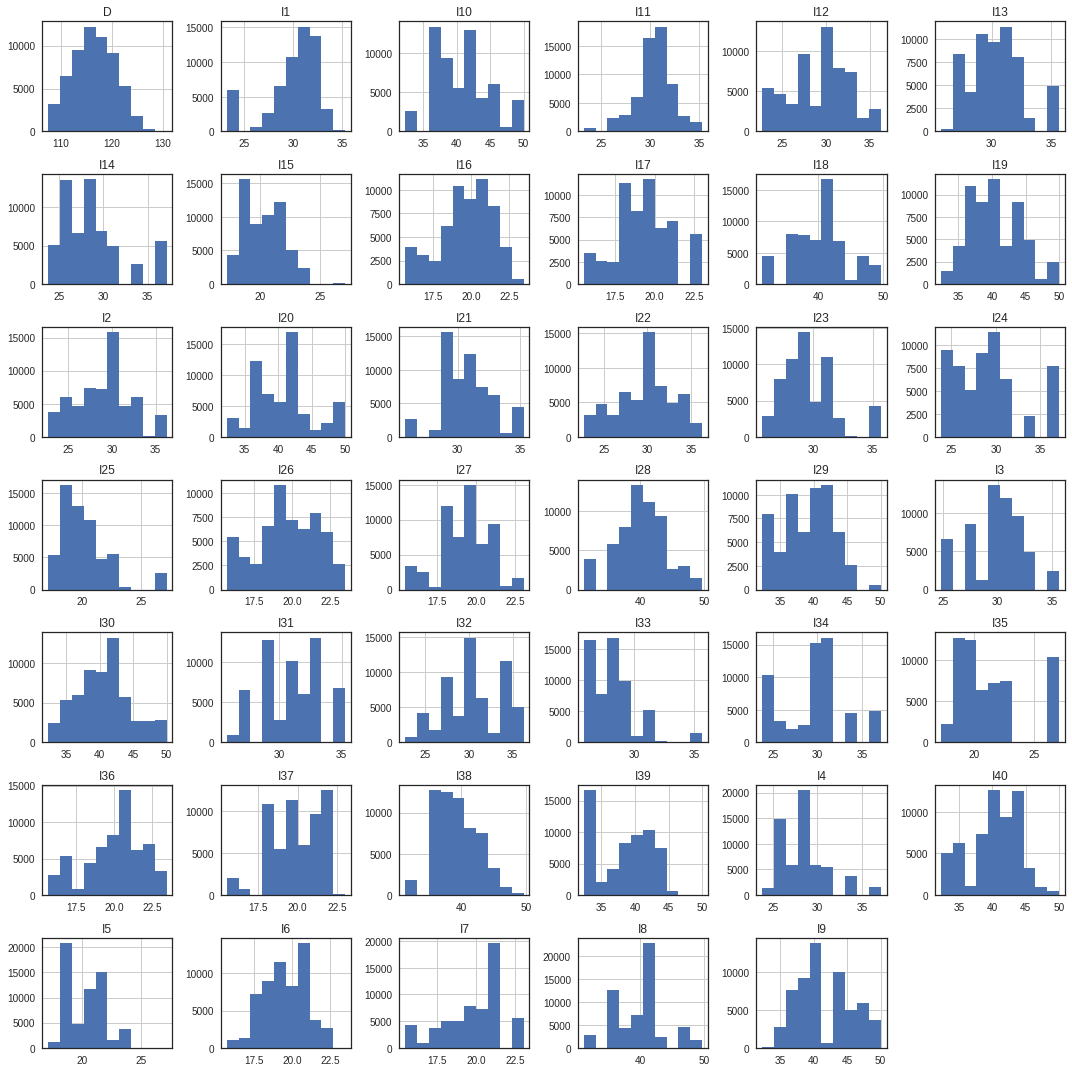

In [6]:
plt.style.use('seaborn-white')
rawdf.hist(figsize=(15,15))
plt.tight_layout()

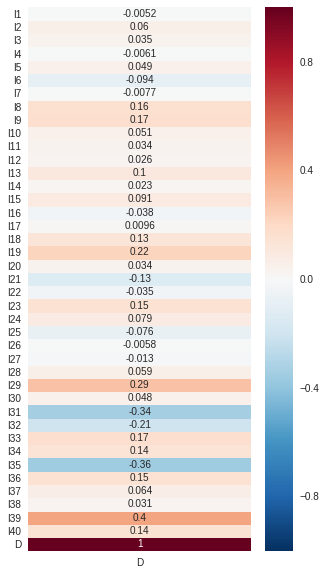

In [7]:
plt.figure(figsize=(5,10))
sns.heatmap(rawdf.corr()[['D']], annot=True, vmin=-1,vmax=1,)

In [0]:
df = rawdf.copy()

#feature scale
ss = StandardScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [9]:
df.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,1.19,2.22,-0.86,-1.31,-0.63,-0.94,1.28,0.27,-0.25,0.19,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
1,-0.82,0.71,0.31,-1.19,0.39,1.83,0.38,-2.15,-1.77,-1.71,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
2,-0.82,0.71,0.31,-1.19,0.39,1.83,0.38,-2.15,-1.77,-1.71,...,-0.13,0.36,-1.04,-1.01,-1.05,0.86,0.27,0.72,-1.28,-2.21
3,0.82,-0.21,-1.95,-0.26,0.07,-1.42,0.74,0.33,-0.33,-0.57,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
4,0.82,-0.21,-1.95,-0.26,0.07,-1.42,0.74,0.33,-0.33,-0.57,...,-0.03,0.66,2.12,-0.82,1.70,-0.04,1.44,-1.63,1.47,-2.21


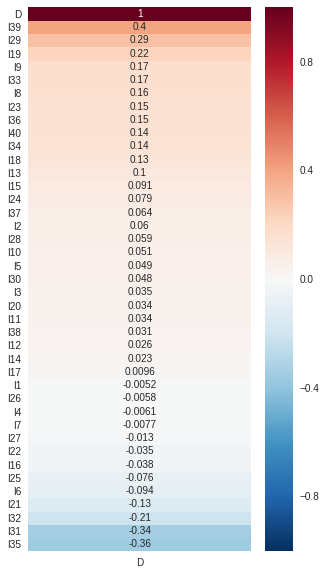

In [10]:
plt.figure(figsize=(5,10))
tempdf = df.corr()[['D']].sort_values('D',ascending=False)
sns.heatmap(tempdf, annot=True, vmin=-1,vmax=1,)

In [11]:
X = df.drop(['D'],axis=1).values
y = (df['D'].values).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


##  1. Using Sigmoid Function

In [0]:
epochs = 100
batch_size = 256

In [58]:
model_1 = Sequential()
model_1.add(Dense(64, input_shape=(X.shape[1],), activation='sigmoid'))
model_1.add(Dense(32, activation='sigmoid'))
model_1.add(Dense(16, activation='sigmoid'))
model_1.add(Dense(8, activation='sigmoid'))
model_1.add(Dense(1))
  
model_1.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))


Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 0.9918 - acc: 0.0000e+00 - val_loss: 0.8024 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.5953 - acc: 0.0000e+00 - val_loss: 0.5301 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.5010 - acc: 0.0000e+00 - val_loss: 0.5073 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.4838 - acc: 0.0000e+00 - val_loss: 0.4903 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.4705 - acc: 0.0000e+00 - val_loss: 0.4790 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.4586 - acc: 0.0000e+00 - val_loss: 0.4682 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.4469 - acc: 0.0000e+00 - val_loss: 0.4525 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.4325 - acc: 0.0000e+00 - val_loss: 0.4364 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.4153 - acc: 0.0000e+00 - val_loss: 0.4168 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.3962 - acc: 0.0000e+00 - val_loss: 0.3994 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.

Epoch 33/100
 - 1s - loss: 0.2677 - acc: 0.0000e+00 - val_loss: 0.2859 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2662 - acc: 0.0000e+00 - val_loss: 0.2864 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2647 - acc: 0.0000e+00 - val_loss: 0.2855 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2628 - acc: 0.0000e+00 - val_loss: 0.2858 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2622 - acc: 0.0000e+00 - val_loss: 0.2829 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2600 - acc: 0.0000e+00 - val_loss: 0.2823 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2594 - acc: 0.0000e+00 - val_loss: 0.2810 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2588 - acc: 0.0000e+00 - val_loss: 0.2801 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2572 - acc: 0.0000e+00 - val_loss: 0.2817 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2563 - acc: 0.0000e+00 - val_loss: 0.2811 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2541 - acc: 0.0000e+00 - val_loss: 0.2778

 - 1s - loss: 0.2381 - acc: 0.0000e+00 - val_loss: 0.2675 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.2377 - acc: 0.0000e+00 - val_loss: 0.2789 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.2380 - acc: 0.0000e+00 - val_loss: 0.2659 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.2369 - acc: 0.0000e+00 - val_loss: 0.2643 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.2362 - acc: 0.0000e+00 - val_loss: 0.2755 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.2365 - acc: 0.0000e+00 - val_loss: 0.2630 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.2348 - acc: 0.0000e+00 - val_loss: 0.2709 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.2348 - acc: 0.0000e+00 - val_loss: 0.2677 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.2343 - acc: 0.0000e+00 - val_loss: 0.2639 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.2331 - acc: 0.0000e+00 - val_loss: 0.2727 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.2337 - acc: 0.0000e+00 - val_loss: 0.2625 - val_acc: 0

 - 1s - loss: 0.2247 - acc: 0.0000e+00 - val_loss: 0.2604 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.2245 - acc: 0.0000e+00 - val_loss: 0.2630 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.2241 - acc: 0.0000e+00 - val_loss: 0.2599 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.2236 - acc: 0.0000e+00 - val_loss: 0.2586 - val_acc: 0.0000e+00


## 2. Using Tanh

In [59]:
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X.shape[1],), activation='tanh'))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(16, activation='tanh'))
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(1))
  
model_2.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 0.5372 - acc: 0.0000e+00 - val_loss: 0.4710 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.4294 - acc: 0.0000e+00 - val_loss: 0.4220 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3817 - acc: 0.0000e+00 - val_loss: 0.3768 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3470 - acc: 0.0000e+00 - val_loss: 0.3488 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3268 - acc: 0.0000e+00 - val_loss: 0.3310 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3116 - acc: 0.0000e+00 - val_loss: 0.3225 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.3017 - acc: 0.0000e+00 - val_loss: 0.3174 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.2931 - acc: 0.0000e+00 - val_loss: 0.3113 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.2866 - acc: 0.0000e+00 - val_loss: 0.2980 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2786 - acc: 0.0000e+00 - val_loss: 0.2980 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.

Epoch 33/100
 - 1s - loss: 0.2222 - acc: 0.0000e+00 - val_loss: 0.2638 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2228 - acc: 0.0000e+00 - val_loss: 0.2598 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2211 - acc: 0.0000e+00 - val_loss: 0.2594 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2198 - acc: 0.0000e+00 - val_loss: 0.2623 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2194 - acc: 0.0000e+00 - val_loss: 0.2600 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2180 - acc: 0.0000e+00 - val_loss: 0.2569 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2173 - acc: 0.0000e+00 - val_loss: 0.2577 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2155 - acc: 0.0000e+00 - val_loss: 0.2594 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2146 - acc: 0.0000e+00 - val_loss: 0.2600 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2138 - acc: 0.0000e+00 - val_loss: 0.2585 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2133 - acc: 0.0000e+00 - val_loss: 0.2583

 - 1s - loss: 0.1984 - acc: 0.0000e+00 - val_loss: 0.2553 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.1976 - acc: 0.0000e+00 - val_loss: 0.2539 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.1968 - acc: 0.0000e+00 - val_loss: 0.2530 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.1965 - acc: 0.0000e+00 - val_loss: 0.2530 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.1967 - acc: 0.0000e+00 - val_loss: 0.2551 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.1963 - acc: 0.0000e+00 - val_loss: 0.2521 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.1948 - acc: 0.0000e+00 - val_loss: 0.2533 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.1944 - acc: 0.0000e+00 - val_loss: 0.2528 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1938 - acc: 0.0000e+00 - val_loss: 0.2509 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1943 - acc: 0.0000e+00 - val_loss: 0.2546 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1940 - acc: 0.0000e+00 - val_loss: 0.2526 - val_acc: 0

 - 1s - loss: 0.1843 - acc: 0.0000e+00 - val_loss: 0.2545 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1840 - acc: 0.0000e+00 - val_loss: 0.2549 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1844 - acc: 0.0000e+00 - val_loss: 0.2551 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1837 - acc: 0.0000e+00 - val_loss: 0.2532 - val_acc: 0.0000e+00


## 3. Using ReLU

In [60]:
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1))
  
model_3.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_3_history = model_3.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 0.5567 - acc: 0.0000e+00 - val_loss: 0.4340 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.3847 - acc: 0.0000e+00 - val_loss: 0.3821 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3487 - acc: 0.0000e+00 - val_loss: 0.3555 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3269 - acc: 0.0000e+00 - val_loss: 0.3379 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3115 - acc: 0.0000e+00 - val_loss: 0.3297 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3003 - acc: 0.0000e+00 - val_loss: 0.3188 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.2897 - acc: 0.0000e+00 - val_loss: 0.3115 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.2805 - acc: 0.0000e+00 - val_loss: 0.3058 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.2744 - acc: 0.0000e+00 - val_loss: 0.3057 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2683 - acc: 0.0000e+00 - val_loss: 0.2984 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.

Epoch 33/100
 - 1s - loss: 0.2096 - acc: 0.0000e+00 - val_loss: 0.2649 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2091 - acc: 0.0000e+00 - val_loss: 0.2673 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2076 - acc: 0.0000e+00 - val_loss: 0.2666 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2079 - acc: 0.0000e+00 - val_loss: 0.2628 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2058 - acc: 0.0000e+00 - val_loss: 0.2661 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2054 - acc: 0.0000e+00 - val_loss: 0.2663 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2047 - acc: 0.0000e+00 - val_loss: 0.2649 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2039 - acc: 0.0000e+00 - val_loss: 0.2656 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2029 - acc: 0.0000e+00 - val_loss: 0.2671 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2016 - acc: 0.0000e+00 - val_loss: 0.2624 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2007 - acc: 0.0000e+00 - val_loss: 0.2653

 - 1s - loss: 0.1890 - acc: 0.0000e+00 - val_loss: 0.2596 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.1876 - acc: 0.0000e+00 - val_loss: 0.2619 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.1886 - acc: 0.0000e+00 - val_loss: 0.2600 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.1873 - acc: 0.0000e+00 - val_loss: 0.2579 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.1855 - acc: 0.0000e+00 - val_loss: 0.2687 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.1863 - acc: 0.0000e+00 - val_loss: 0.2607 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.1862 - acc: 0.0000e+00 - val_loss: 0.2599 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.1841 - acc: 0.0000e+00 - val_loss: 0.2629 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1853 - acc: 0.0000e+00 - val_loss: 0.2593 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1853 - acc: 0.0000e+00 - val_loss: 0.2594 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1846 - acc: 0.0000e+00 - val_loss: 0.2622 - val_acc: 0

 - 1s - loss: 0.1785 - acc: 0.0000e+00 - val_loss: 0.2601 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1787 - acc: 0.0000e+00 - val_loss: 0.2589 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1775 - acc: 0.0000e+00 - val_loss: 0.2612 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1782 - acc: 0.0000e+00 - val_loss: 0.2606 - val_acc: 0.0000e+00


## 4. Using LeakyReLU


In [61]:
model_4 = Sequential()
model_4.add(Dense(64, input_shape=(X.shape[1],)))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(32))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(16))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(8))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(1))
  
model_4.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_4_history = model_4.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 0.5532 - acc: 0.0000e+00 - val_loss: 0.4297 - val_acc: 0.0000e+00
Epoch 2/100
 - 2s - loss: 0.3879 - acc: 0.0000e+00 - val_loss: 0.3779 - val_acc: 0.0000e+00
Epoch 3/100
 - 2s - loss: 0.3513 - acc: 0.0000e+00 - val_loss: 0.3568 - val_acc: 0.0000e+00
Epoch 4/100
 - 2s - loss: 0.3277 - acc: 0.0000e+00 - val_loss: 0.3423 - val_acc: 0.0000e+00
Epoch 5/100
 - 2s - loss: 0.3119 - acc: 0.0000e+00 - val_loss: 0.3327 - val_acc: 0.0000e+00
Epoch 6/100
 - 2s - loss: 0.3001 - acc: 0.0000e+00 - val_loss: 0.3225 - val_acc: 0.0000e+00
Epoch 7/100
 - 2s - loss: 0.2897 - acc: 0.0000e+00 - val_loss: 0.3127 - val_acc: 0.0000e+00
Epoch 8/100
 - 2s - loss: 0.2827 - acc: 0.0000e+00 - val_loss: 0.3072 - val_acc: 0.0000e+00
Epoch 9/100
 - 2s - loss: 0.2745 - acc: 0.0000e+00 - val_loss: 0.3044 - val_acc: 0.0000e+00
Epoch 10/100
 - 2s - loss: 0.2684 - acc: 0.0000e+00 - val_loss: 0.2963 - val_acc: 0.0000e+00
Epoch 11/100
 - 2s - loss: 0.

Epoch 33/100
 - 2s - loss: 0.2126 - acc: 0.0000e+00 - val_loss: 0.2661 - val_acc: 0.0000e+00
Epoch 34/100
 - 2s - loss: 0.2110 - acc: 0.0000e+00 - val_loss: 0.2663 - val_acc: 0.0000e+00
Epoch 35/100
 - 2s - loss: 0.2098 - acc: 0.0000e+00 - val_loss: 0.2727 - val_acc: 0.0000e+00
Epoch 36/100
 - 2s - loss: 0.2088 - acc: 0.0000e+00 - val_loss: 0.2663 - val_acc: 0.0000e+00
Epoch 37/100
 - 2s - loss: 0.2084 - acc: 0.0000e+00 - val_loss: 0.2669 - val_acc: 0.0000e+00
Epoch 38/100
 - 2s - loss: 0.2070 - acc: 0.0000e+00 - val_loss: 0.2660 - val_acc: 0.0000e+00
Epoch 39/100
 - 2s - loss: 0.2077 - acc: 0.0000e+00 - val_loss: 0.2696 - val_acc: 0.0000e+00
Epoch 40/100
 - 2s - loss: 0.2065 - acc: 0.0000e+00 - val_loss: 0.2661 - val_acc: 0.0000e+00
Epoch 41/100
 - 2s - loss: 0.2047 - acc: 0.0000e+00 - val_loss: 0.2661 - val_acc: 0.0000e+00
Epoch 42/100
 - 2s - loss: 0.2038 - acc: 0.0000e+00 - val_loss: 0.2635 - val_acc: 0.0000e+00
Epoch 43/100
 - 2s - loss: 0.2033 - acc: 0.0000e+00 - val_loss: 0.2637

 - 2s - loss: 0.1908 - acc: 0.0000e+00 - val_loss: 0.2609 - val_acc: 0.0000e+00
Epoch 66/100
 - 2s - loss: 0.1895 - acc: 0.0000e+00 - val_loss: 0.2652 - val_acc: 0.0000e+00
Epoch 67/100
 - 2s - loss: 0.1905 - acc: 0.0000e+00 - val_loss: 0.2584 - val_acc: 0.0000e+00
Epoch 68/100
 - 2s - loss: 0.1899 - acc: 0.0000e+00 - val_loss: 0.2600 - val_acc: 0.0000e+00
Epoch 69/100
 - 2s - loss: 0.1894 - acc: 0.0000e+00 - val_loss: 0.2572 - val_acc: 0.0000e+00
Epoch 70/100
 - 2s - loss: 0.1888 - acc: 0.0000e+00 - val_loss: 0.2599 - val_acc: 0.0000e+00
Epoch 71/100
 - 2s - loss: 0.1889 - acc: 0.0000e+00 - val_loss: 0.2624 - val_acc: 0.0000e+00
Epoch 72/100
 - 2s - loss: 0.1880 - acc: 0.0000e+00 - val_loss: 0.2599 - val_acc: 0.0000e+00
Epoch 73/100
 - 2s - loss: 0.1896 - acc: 0.0000e+00 - val_loss: 0.2597 - val_acc: 0.0000e+00
Epoch 74/100
 - 2s - loss: 0.1875 - acc: 0.0000e+00 - val_loss: 0.2652 - val_acc: 0.0000e+00
Epoch 75/100
 - 2s - loss: 0.1870 - acc: 0.0000e+00 - val_loss: 0.2606 - val_acc: 0

 - 2s - loss: 0.1818 - acc: 0.0000e+00 - val_loss: 0.2615 - val_acc: 0.0000e+00
Epoch 98/100
 - 2s - loss: 0.1809 - acc: 0.0000e+00 - val_loss: 0.2574 - val_acc: 0.0000e+00
Epoch 99/100
 - 2s - loss: 0.1805 - acc: 0.0000e+00 - val_loss: 0.2606 - val_acc: 0.0000e+00
Epoch 100/100
 - 2s - loss: 0.1804 - acc: 0.0000e+00 - val_loss: 0.2615 - val_acc: 0.0000e+00


## 5. Using PReLU

In [62]:
model_5 = Sequential()
model_5.add(Dense(64, input_shape=(X.shape[1],)))
model_5.add(PReLU())
model_5.add(Dense(32))
model_5.add(PReLU())
model_5.add(Dense(16))
model_5.add(PReLU())
model_5.add(Dense(8))
model_5.add(PReLU())
model_5.add(Dense(1))
  
model_5.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_5_history = model_5.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 0.5511 - acc: 0.0000e+00 - val_loss: 0.4211 - val_acc: 0.0000e+00
Epoch 2/100
 - 2s - loss: 0.3792 - acc: 0.0000e+00 - val_loss: 0.3756 - val_acc: 0.0000e+00
Epoch 3/100
 - 2s - loss: 0.3458 - acc: 0.0000e+00 - val_loss: 0.3551 - val_acc: 0.0000e+00
Epoch 4/100
 - 2s - loss: 0.3272 - acc: 0.0000e+00 - val_loss: 0.3371 - val_acc: 0.0000e+00
Epoch 5/100
 - 2s - loss: 0.3122 - acc: 0.0000e+00 - val_loss: 0.3271 - val_acc: 0.0000e+00
Epoch 6/100
 - 2s - loss: 0.3005 - acc: 0.0000e+00 - val_loss: 0.3155 - val_acc: 0.0000e+00
Epoch 7/100
 - 2s - loss: 0.2900 - acc: 0.0000e+00 - val_loss: 0.3088 - val_acc: 0.0000e+00
Epoch 8/100
 - 2s - loss: 0.2805 - acc: 0.0000e+00 - val_loss: 0.3065 - val_acc: 0.0000e+00
Epoch 9/100
 - 2s - loss: 0.2736 - acc: 0.0000e+00 - val_loss: 0.2950 - val_acc: 0.0000e+00
Epoch 10/100
 - 2s - loss: 0.2671 - acc: 0.0000e+00 - val_loss: 0.2947 - val_acc: 0.0000e+00
Epoch 11/100
 - 2s - loss: 0.

Epoch 33/100
 - 2s - loss: 0.2058 - acc: 0.0000e+00 - val_loss: 0.2593 - val_acc: 0.0000e+00
Epoch 34/100
 - 2s - loss: 0.2051 - acc: 0.0000e+00 - val_loss: 0.2615 - val_acc: 0.0000e+00
Epoch 35/100
 - 2s - loss: 0.2026 - acc: 0.0000e+00 - val_loss: 0.2568 - val_acc: 0.0000e+00
Epoch 36/100
 - 2s - loss: 0.2019 - acc: 0.0000e+00 - val_loss: 0.2610 - val_acc: 0.0000e+00
Epoch 37/100
 - 2s - loss: 0.2018 - acc: 0.0000e+00 - val_loss: 0.2580 - val_acc: 0.0000e+00
Epoch 38/100
 - 2s - loss: 0.2000 - acc: 0.0000e+00 - val_loss: 0.2554 - val_acc: 0.0000e+00
Epoch 39/100
 - 2s - loss: 0.1991 - acc: 0.0000e+00 - val_loss: 0.2576 - val_acc: 0.0000e+00
Epoch 40/100
 - 2s - loss: 0.1988 - acc: 0.0000e+00 - val_loss: 0.2606 - val_acc: 0.0000e+00
Epoch 41/100
 - 2s - loss: 0.1979 - acc: 0.0000e+00 - val_loss: 0.2606 - val_acc: 0.0000e+00
Epoch 42/100
 - 2s - loss: 0.1974 - acc: 0.0000e+00 - val_loss: 0.2557 - val_acc: 0.0000e+00
Epoch 43/100
 - 2s - loss: 0.1964 - acc: 0.0000e+00 - val_loss: 0.2575

 - 2s - loss: 0.1821 - acc: 0.0000e+00 - val_loss: 0.2514 - val_acc: 0.0000e+00
Epoch 66/100
 - 2s - loss: 0.1823 - acc: 0.0000e+00 - val_loss: 0.2488 - val_acc: 0.0000e+00
Epoch 67/100
 - 2s - loss: 0.1821 - acc: 0.0000e+00 - val_loss: 0.2512 - val_acc: 0.0000e+00
Epoch 68/100
 - 2s - loss: 0.1808 - acc: 0.0000e+00 - val_loss: 0.2546 - val_acc: 0.0000e+00
Epoch 69/100
 - 2s - loss: 0.1815 - acc: 0.0000e+00 - val_loss: 0.2537 - val_acc: 0.0000e+00
Epoch 70/100
 - 2s - loss: 0.1798 - acc: 0.0000e+00 - val_loss: 0.2503 - val_acc: 0.0000e+00
Epoch 71/100
 - 2s - loss: 0.1799 - acc: 0.0000e+00 - val_loss: 0.2501 - val_acc: 0.0000e+00
Epoch 72/100
 - 2s - loss: 0.1797 - acc: 0.0000e+00 - val_loss: 0.2518 - val_acc: 0.0000e+00
Epoch 73/100
 - 2s - loss: 0.1790 - acc: 0.0000e+00 - val_loss: 0.2552 - val_acc: 0.0000e+00
Epoch 74/100
 - 2s - loss: 0.1788 - acc: 0.0000e+00 - val_loss: 0.2547 - val_acc: 0.0000e+00
Epoch 75/100
 - 2s - loss: 0.1787 - acc: 0.0000e+00 - val_loss: 0.2530 - val_acc: 0

 - 2s - loss: 0.1706 - acc: 0.0000e+00 - val_loss: 0.2502 - val_acc: 0.0000e+00
Epoch 98/100
 - 2s - loss: 0.1727 - acc: 0.0000e+00 - val_loss: 0.2537 - val_acc: 0.0000e+00
Epoch 99/100
 - 2s - loss: 0.1721 - acc: 0.0000e+00 - val_loss: 0.2509 - val_acc: 0.0000e+00
Epoch 100/100
 - 2s - loss: 0.1713 - acc: 0.0000e+00 - val_loss: 0.2524 - val_acc: 0.0000e+00


## 6. Using Linear Function

In [63]:
model_6 = Sequential()
model_6.add(Dense(64, input_shape=(X.shape[1],)))
model_6.add(Dense(32, activation='linear'))
model_6.add(Dense(16, activation='linear'))
model_6.add(Dense(8, activation='linear'))
model_6.add(Dense(1))
  
model_6.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_6_history = model_6.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 0.6001 - acc: 0.0000e+00 - val_loss: 0.5239 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.5082 - acc: 0.0000e+00 - val_loss: 0.5186 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.5068 - acc: 0.0000e+00 - val_loss: 0.5182 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.5055 - acc: 0.0000e+00 - val_loss: 0.5173 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.5047 - acc: 0.0000e+00 - val_loss: 0.5219 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.5047 - acc: 0.0000e+00 - val_loss: 0.5204 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.5050 - acc: 0.0000e+00 - val_loss: 0.5215 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.5040 - acc: 0.0000e+00 - val_loss: 0.5205 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.5031 - acc: 0.0000e+00 - val_loss: 0.5175 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.5028 - acc: 0.0000e+00 - val_loss: 0.5160 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.

Epoch 33/100
 - 1s - loss: 0.5000 - acc: 0.0000e+00 - val_loss: 0.5138 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.5004 - acc: 0.0000e+00 - val_loss: 0.5151 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.5000 - acc: 0.0000e+00 - val_loss: 0.5139 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.4997 - acc: 0.0000e+00 - val_loss: 0.5142 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.4994 - acc: 0.0000e+00 - val_loss: 0.5138 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.5002 - acc: 0.0000e+00 - val_loss: 0.5159 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.5006 - acc: 0.0000e+00 - val_loss: 0.5147 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.5000 - acc: 0.0000e+00 - val_loss: 0.5134 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.5000 - acc: 0.0000e+00 - val_loss: 0.5141 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.5002 - acc: 0.0000e+00 - val_loss: 0.5140 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.5005 - acc: 0.0000e+00 - val_loss: 0.5145

 - 1s - loss: 0.4995 - acc: 0.0000e+00 - val_loss: 0.5147 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.4994 - acc: 0.0000e+00 - val_loss: 0.5139 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.4991 - acc: 0.0000e+00 - val_loss: 0.5158 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.4991 - acc: 0.0000e+00 - val_loss: 0.5142 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.4995 - acc: 0.0000e+00 - val_loss: 0.5143 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.4997 - acc: 0.0000e+00 - val_loss: 0.5136 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.4989 - acc: 0.0000e+00 - val_loss: 0.5135 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.4993 - acc: 0.0000e+00 - val_loss: 0.5133 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.4991 - acc: 0.0000e+00 - val_loss: 0.5144 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.4993 - acc: 0.0000e+00 - val_loss: 0.5147 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.4995 - acc: 0.0000e+00 - val_loss: 0.5147 - val_acc: 0

 - 1s - loss: 0.4993 - acc: 0.0000e+00 - val_loss: 0.5137 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.4990 - acc: 0.0000e+00 - val_loss: 0.5162 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.4989 - acc: 0.0000e+00 - val_loss: 0.5137 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.4989 - acc: 0.0000e+00 - val_loss: 0.5151 - val_acc: 0.0000e+00


## 7. Using Elu

In [64]:
model_7 = Sequential()
model_7.add(Dense(64, input_shape=(X.shape[1],), activation='elu'))
model_7.add(Dense(32, activation='elu'))
model_7.add(Dense(16, activation='elu'))
model_7.add(Dense(8, activation='elu'))
model_7.add(Dense(1))
model_7.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_7_history = model_7.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 0.5124 - acc: 0.0000e+00 - val_loss: 0.4186 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.3804 - acc: 0.0000e+00 - val_loss: 0.3730 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3504 - acc: 0.0000e+00 - val_loss: 0.3508 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3334 - acc: 0.0000e+00 - val_loss: 0.3359 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3199 - acc: 0.0000e+00 - val_loss: 0.3297 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3107 - acc: 0.0000e+00 - val_loss: 0.3199 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.3031 - acc: 0.0000e+00 - val_loss: 0.3174 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.2957 - acc: 0.0000e+00 - val_loss: 0.3078 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.2885 - acc: 0.0000e+00 - val_loss: 0.3037 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2838 - acc: 0.0000e+00 - val_loss: 0.3022 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.

Epoch 33/100
 - 1s - loss: 0.2300 - acc: 0.0000e+00 - val_loss: 0.2599 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2295 - acc: 0.0000e+00 - val_loss: 0.2579 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2285 - acc: 0.0000e+00 - val_loss: 0.2604 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2277 - acc: 0.0000e+00 - val_loss: 0.2542 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2265 - acc: 0.0000e+00 - val_loss: 0.2570 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2250 - acc: 0.0000e+00 - val_loss: 0.2556 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2237 - acc: 0.0000e+00 - val_loss: 0.2546 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2225 - acc: 0.0000e+00 - val_loss: 0.2535 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2213 - acc: 0.0000e+00 - val_loss: 0.2512 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2203 - acc: 0.0000e+00 - val_loss: 0.2509 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2205 - acc: 0.0000e+00 - val_loss: 0.2518

 - 1s - loss: 0.2031 - acc: 0.0000e+00 - val_loss: 0.2434 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.2045 - acc: 0.0000e+00 - val_loss: 0.2414 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.2026 - acc: 0.0000e+00 - val_loss: 0.2438 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.2036 - acc: 0.0000e+00 - val_loss: 0.2421 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.2009 - acc: 0.0000e+00 - val_loss: 0.2479 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.2009 - acc: 0.0000e+00 - val_loss: 0.2427 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.2005 - acc: 0.0000e+00 - val_loss: 0.2468 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.2008 - acc: 0.0000e+00 - val_loss: 0.2424 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1994 - acc: 0.0000e+00 - val_loss: 0.2406 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1991 - acc: 0.0000e+00 - val_loss: 0.2437 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1985 - acc: 0.0000e+00 - val_loss: 0.2407 - val_acc: 0

 - 1s - loss: 0.1898 - acc: 0.0000e+00 - val_loss: 0.2385 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1903 - acc: 0.0000e+00 - val_loss: 0.2431 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1884 - acc: 0.0000e+00 - val_loss: 0.2390 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1886 - acc: 0.0000e+00 - val_loss: 0.2368 - val_acc: 0.0000e+00


## 8. Using hard_sigmoid


In [65]:
model_8 = Sequential()
model_8.add(Dense(64, input_shape=(X.shape[1],), activation='hard_sigmoid'))
model_8.add(Dense(32, activation='hard_sigmoid'))
model_8.add(Dense(16, activation='hard_sigmoid'))
model_8.add(Dense(8, activation='hard_sigmoid'))
model_8.add(Dense(1))
  
model_8.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_8_history = model_8.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 4s - loss: 1.4217 - acc: 0.0000e+00 - val_loss: 0.9366 - val_acc: 0.0000e+00
Epoch 2/100
 - 2s - loss: 0.7802 - acc: 0.0000e+00 - val_loss: 0.6523 - val_acc: 0.0000e+00
Epoch 3/100
 - 2s - loss: 0.5473 - acc: 0.0000e+00 - val_loss: 0.5264 - val_acc: 0.0000e+00
Epoch 4/100
 - 2s - loss: 0.4971 - acc: 0.0000e+00 - val_loss: 0.5085 - val_acc: 0.0000e+00
Epoch 5/100
 - 2s - loss: 0.4882 - acc: 0.0000e+00 - val_loss: 0.5024 - val_acc: 0.0000e+00
Epoch 6/100
 - 2s - loss: 0.4829 - acc: 0.0000e+00 - val_loss: 0.4982 - val_acc: 0.0000e+00
Epoch 7/100
 - 2s - loss: 0.4788 - acc: 0.0000e+00 - val_loss: 0.4914 - val_acc: 0.0000e+00
Epoch 8/100
 - 2s - loss: 0.4735 - acc: 0.0000e+00 - val_loss: 0.4862 - val_acc: 0.0000e+00
Epoch 9/100
 - 2s - loss: 0.4666 - acc: 0.0000e+00 - val_loss: 0.4779 - val_acc: 0.0000e+00
Epoch 10/100
 - 2s - loss: 0.4572 - acc: 0.0000e+00 - val_loss: 0.4698 - val_acc: 0.0000e+00
Epoch 11/100
 - 2s - loss: 0.

Epoch 33/100
 - 2s - loss: 0.2953 - acc: 0.0000e+00 - val_loss: 0.3136 - val_acc: 0.0000e+00
Epoch 34/100
 - 2s - loss: 0.2937 - acc: 0.0000e+00 - val_loss: 0.3110 - val_acc: 0.0000e+00
Epoch 35/100
 - 2s - loss: 0.2913 - acc: 0.0000e+00 - val_loss: 0.3092 - val_acc: 0.0000e+00
Epoch 36/100
 - 2s - loss: 0.2877 - acc: 0.0000e+00 - val_loss: 0.3133 - val_acc: 0.0000e+00
Epoch 37/100
 - 2s - loss: 0.2854 - acc: 0.0000e+00 - val_loss: 0.3078 - val_acc: 0.0000e+00
Epoch 38/100
 - 2s - loss: 0.2828 - acc: 0.0000e+00 - val_loss: 0.3078 - val_acc: 0.0000e+00
Epoch 39/100
 - 2s - loss: 0.2812 - acc: 0.0000e+00 - val_loss: 0.3072 - val_acc: 0.0000e+00
Epoch 40/100
 - 2s - loss: 0.2799 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 41/100
 - 2s - loss: 0.2777 - acc: 0.0000e+00 - val_loss: 0.2991 - val_acc: 0.0000e+00
Epoch 42/100
 - 2s - loss: 0.2749 - acc: 0.0000e+00 - val_loss: 0.3000 - val_acc: 0.0000e+00
Epoch 43/100
 - 2s - loss: 0.2739 - acc: 0.0000e+00 - val_loss: 0.2977

 - 2s - loss: 0.2484 - acc: 0.0000e+00 - val_loss: 0.2840 - val_acc: 0.0000e+00
Epoch 66/100
 - 2s - loss: 0.2481 - acc: 0.0000e+00 - val_loss: 0.2773 - val_acc: 0.0000e+00
Epoch 67/100
 - 2s - loss: 0.2469 - acc: 0.0000e+00 - val_loss: 0.2816 - val_acc: 0.0000e+00
Epoch 68/100
 - 2s - loss: 0.2465 - acc: 0.0000e+00 - val_loss: 0.2786 - val_acc: 0.0000e+00
Epoch 69/100
 - 2s - loss: 0.2466 - acc: 0.0000e+00 - val_loss: 0.2774 - val_acc: 0.0000e+00
Epoch 70/100
 - 2s - loss: 0.2447 - acc: 0.0000e+00 - val_loss: 0.2765 - val_acc: 0.0000e+00
Epoch 71/100
 - 2s - loss: 0.2448 - acc: 0.0000e+00 - val_loss: 0.2781 - val_acc: 0.0000e+00
Epoch 72/100
 - 2s - loss: 0.2437 - acc: 0.0000e+00 - val_loss: 0.2828 - val_acc: 0.0000e+00
Epoch 73/100
 - 2s - loss: 0.2437 - acc: 0.0000e+00 - val_loss: 0.2766 - val_acc: 0.0000e+00
Epoch 74/100
 - 2s - loss: 0.2423 - acc: 0.0000e+00 - val_loss: 0.2789 - val_acc: 0.0000e+00
Epoch 75/100
 - 2s - loss: 0.2421 - acc: 0.0000e+00 - val_loss: 0.2742 - val_acc: 0

 - 2s - loss: 0.2317 - acc: 0.0000e+00 - val_loss: 0.2709 - val_acc: 0.0000e+00
Epoch 98/100
 - 2s - loss: 0.2303 - acc: 0.0000e+00 - val_loss: 0.2684 - val_acc: 0.0000e+00
Epoch 99/100
 - 2s - loss: 0.2304 - acc: 0.0000e+00 - val_loss: 0.2691 - val_acc: 0.0000e+00
Epoch 100/100
 - 2s - loss: 0.2301 - acc: 0.0000e+00 - val_loss: 0.2682 - val_acc: 0.0000e+00


## Plot the Result and Compare

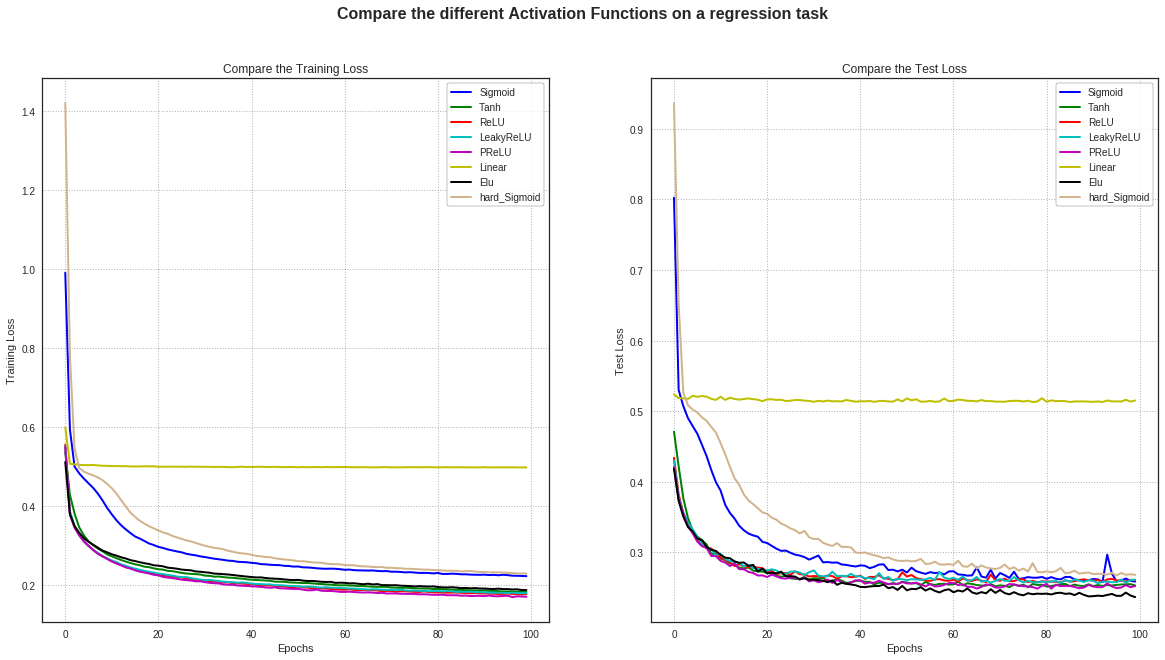

In [66]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))


ax1.plot(model_1_history.history['loss'],color='b',linewidth=2,label='Sigmoid')
ax1.plot(model_2_history.history['loss'],color='g',linewidth=2,label='Tanh')
ax1.plot(model_3_history.history['loss'],color='r',linewidth=2,label='ReLU')
ax1.plot(model_4_history.history['loss'],color='c',linewidth=2,label='LeakyReLU')
ax1.plot(model_5_history.history['loss'],color='m',linewidth=2,label='PReLU')
ax1.plot(model_6_history.history['loss'],color='y',linewidth=2,label='Linear')
ax1.plot(model_7_history.history['loss'],color='k',linewidth=2,label='Elu')
ax1.plot(model_8_history.history['loss'],color='tan',linewidth=2,label='hard_Sigmoid')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Loss')


ax2.plot(model_1_history.history['val_loss'],color='b',linewidth=2,label='Sigmoid')
ax2.plot(model_2_history.history['val_loss'],color='g',linewidth=2,label='Tanh')
ax2.plot(model_3_history.history['val_loss'],color='r',linewidth=2,label='ReLU')
ax2.plot(model_4_history.history['val_loss'],color='c',linewidth=2,label='LeakyReLU')
ax2.plot(model_5_history.history['val_loss'],color='m',linewidth=2,label='PReLU')
ax2.plot(model_6_history.history['val_loss'],color='y',linewidth=2,label='Linear')
ax2.plot(model_7_history.history['val_loss'],color='k',linewidth=2,label='Elu')
ax2.plot(model_8_history.history['val_loss'],color='tan',linewidth=2,label='hard_Sigmoid')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Loss')


fig.suptitle('Compare the different Activation Functions on a regression task',fontsize=16, fontweight='bold')
plt.show()